age
sex
body_type (should combine some values)
height (drop too high and too low)
job
location (transform into a boolean livels_in_sanfrancisco)
sign ("add prefer not to say to missing data")

In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

# Preprocessing the data and training the model

In [243]:
raw_dataset = pd.read_csv('../data/okcupid.csv') 
okcupid_profiles = raw_dataset.drop(columns="Unnamed: 0") 

As we can see from the output below, almost every column contains object types, which we can not use to fit the Random Forest. 
We need to convert the objects into numbers, and we can do that using OrdinalEncoder from sklearn.
We need to manage the missing data first tho

In [244]:
okcupid_profiles.dtypes

age              int64
status          object
sex             object
orientation     object
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
pets            object
religion        object
sign            object
smokes          object
speaks          object
dtype: object

## Reworking the dataset
### Dropping columns

We noticed that for many labels, the value distribution is... a bit unusable. We have like 50000 occurences of a single value, and too few of the others.
We decided to solve this by introducing some changes to the dataset.

We are going to drop the following columns:

In [245]:
for element in okcupid_profiles.columns:
    print(element)

age
status
sex
orientation
body_type
diet
drinks
drugs
education
ethnicity
height
income
job
last_online
location
offspring
pets
religion
sign
smokes
speaks


In [246]:
okcupid_profiles = okcupid_profiles.drop(columns = ['status', 
                                                     'orientation',
                                                     'diet',
                                                     'drinks',
                                                     'drugs',
                                                     'education',
                                                     'ethnicity',
                                                     'income',
                                                     'last_online',
                                                     'offspring',
                                                     'pets',
                                                     'smokes',
                                                     'speaks'])

Now we are left with:

In [247]:
for element in okcupid_profiles.columns:
    print(element)

age
sex
body_type
height
job
location
religion
sign


### Handling 'religion'

In [248]:
pd.isna(okcupid_profiles["religion"]).sum()

20226

In [249]:
okcupid_profiles['religion'].value_counts()

agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too serious ab

As we can see from the value count, the data is a bit too sparse. We are going to merge all the various religion occurences together.

In [250]:
# in the religion column, find values containing the word "christian" and replace them with "christian"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('christianity but not too serious about it', 'christian')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('christianity and very serious about it', 'christian')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('christianity and somewhat serious about it', 'christian')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('christianity and laughing about it', 'christian')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('christianity and somewhat serious about it', 'christian')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('christianity and very serious about it', 'christian')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('christianity', 'christian')

In [251]:
# in the religion column, find values containing the word "agnosticism" and replace them with "agnostic"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('agnosticism but not too serious about it', 'agnostic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('agnosticism and very serious about it', 'agnostic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('agnosticism and somewhat serious about it', 'agnostic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('agnosticism and laughing about it', 'agnostic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('agnosticism and somewhat serious about it', 'agnostic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('agnosticism and very serious about it', 'agnostic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('agnosticism', 'agnostic')

In [252]:
# in the religion column, find values containing the word "atheism" and replace them with "atheist"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('atheism but not too serious about it', 'atheist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('atheism and very serious about it', 'atheist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('atheism and somewhat serious about it', 'atheist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('atheism and laughing about it', 'atheist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('atheism and somewhat serious about it', 'atheist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('atheism and very serious about it', 'atheist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('atheism', 'atheist')

In [253]:
# in the religion column, find values containing the word "catholicism" and replace them with "catholic"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('catholicism but not too serious about it', 'catholic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('catholicism and very serious about it', 'catholic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('catholicism and somewhat serious about it', 'catholic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('catholicism and laughing about it', 'catholic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('catholicism and somewhat serious about it', 'catholic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('catholicism and very serious about it', 'catholic')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('catholicism', 'catholic')

In [254]:
# in the religion column, find values containing the word "judaism" and replace them with "jewish"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('judaism but not too serious about it', 'jewish')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('judaism and very serious about it', 'jewish')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('judaism and somewhat serious about it', 'jewish')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('judaism and laughing about it', 'jewish')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('judaism and somewhat serious about it', 'jewish')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('judaism and very serious about it', 'jewish')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('judaism', 'jewish')

In [255]:
# in the religion column, find values containing the word "buddhism" and replace them with "buddhist"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('buddhism but not too serious about it', 'buddhist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('buddhism and very serious about it', 'buddhist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('buddhism and somewhat serious about it', 'buddhist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('buddhism and laughing about it', 'buddhist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('buddhism and somewhat serious about it', 'buddhist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('buddhism and very serious about it', 'buddhist')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('buddhism', 'buddhist')

In [256]:
# in the religion column, find values containing the word "hinduism" and replace them with "hindu"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('hinduism but not too serious about it', 'hindu')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('hinduism and very serious about it', 'hindu')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('hinduism and somewhat serious about it', 'hindu')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('hinduism and laughing about it', 'hindu')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('hinduism and somewhat serious about it', 'hindu')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('hinduism and very serious about it', 'hindu')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('hinduism', 'hindu')

In [257]:
# in the religion column, find values containing the word "islam" and replace them with "muslim"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('islam but not too serious about it', 'muslim')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('islam and very serious about it', 'muslim')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('islam and somewhat serious about it', 'muslim')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('islam and laughing about it', 'muslim')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('islam and somewhat serious about it', 'muslim')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('islam and very serious about it', 'muslim')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('islam', 'muslim')

In [258]:
# in the religion column, find values containing the word "other" and replace them with "other"
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('other but not too serious about it', 'other')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('other and very serious about it', 'other')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('other and somewhat serious about it', 'other')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('other and laughing about it', 'other')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('other and somewhat serious about it', 'other')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('other and very serious about it', 'other')
okcupid_profiles['religion'] = okcupid_profiles['religion'].str.replace('other', 'other')

In [259]:
print(okcupid_profiles['religion'].value_counts())
print("Missing values: ", okcupid_profiles['religion'].isnull().sum())

agnostic     8812
other        7743
atheist      6985
christian    5787
catholic     4758
jewish       3098
buddhist     1948
hindu         450
muslim        139
Name: religion, dtype: int64
Missing values:  20226


At this point, we noticed that we have too many missing values, since we are also considering the 'other' as basically missing. So we are just going to have to convert the religion attribute to a boolean.

In [260]:
"""for the religion column, convert the missing data into a boolean false, 
convert the 'other' values into boolean false, and the rest boolean true
"""
okcupid_profiles['religion'] = okcupid_profiles['religion'].fillna(False)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('other', False)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('agnostic', True)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('atheist', True)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('christian', True)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('catholic', True)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('jewish', True)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('buddhist', True)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('hindu', True)
okcupid_profiles['religion'] = okcupid_profiles['religion'].replace('muslim', True)


In [261]:
okcupid_profiles.rename(columns = {'religion': 'religious'}, inplace=True)

In [262]:
okcupid_profiles['religious'].value_counts()

True     31977
False    27969
Name: religious, dtype: int64

### Handling 'sign'

### Handling 'location'  

In [263]:
okcupid_profiles['location'].value_counts()

san francisco, california         31064
oakland, california                7214
berkeley, california               4212
san mateo, california              1331
palo alto, california              1064
                                  ...  
south wellfleet, massachusetts        1
orange, california                    1
astoria, new york                     1
london, united kingdom                1
rochester, michigan                   1
Name: location, Length: 199, dtype: int64

In [265]:
okcupid_profiles['location'] = okcupid_profiles['location'].fillna(False)
okcupid_profiles['location'] = (okcupid_profiles['location'] == 'san francisco, california')
okcupid_profiles.rename(columns = {'religion': 'lives_in_san_francisco'}, inplace=True)

In [266]:
okcupid_profiles['lives_in_san_francisco'].value_counts()

True     31064
False    28882
Name: location, dtype: int64

Now the religious column is a boolean

## Filling the missing data

The columns containing missing data are the following:

In [328]:
print(okcupid_profiles.isna().sum())

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
dtype: int64


Comparing the missing data output with the dtype output, we can easily see how, except for height, all the missing data are categorical strings.

Since there are only three rows with missing values for height, instead of replacing the NaN with something like 0 or -1, or the average height, we think it's better to just drop them, since it is such a small number

In [329]:
okcupid_profiles = okcupid_profiles.dropna(how = 'any', subset = 'height') 

For all the others attributes, we will just replace the missing values with the 'missing' string.

In [330]:
okcupid_profiles = okcupid_profiles.fillna(value = 'missing')

And now all the columns contain something

In [331]:
print(okcupid_profiles.isna().sum())

age            0
status         0
sex            0
orientation    0
body_type      0
diet           0
drinks         0
drugs          0
education      0
ethnicity      0
height         0
income         0
job            0
last_online    0
location       0
offspring      0
pets           0
religion       0
sign           0
smokes         0
speaks         0
dtype: int64


## Encoding the data

In [332]:
enc = OrdinalEncoder()
enc.fit(okcupid_profiles)

OrdinalEncoder()

In [333]:
encoded_data = enc.transform(okcupid_profiles)

Now we have a Numpy array with the encoded data, so no more objects, but only numbers.

In [334]:
encoded_data.dtype

dtype('float64')

# Random Forest

## Education prediction model

In [335]:
# remember that now we have a Numpy array

y = encoded_data[:,6] # This should pick the education column

X = encoded_data[:, [1,2,3,4,5,7,8,15,16]] # Pick income and job
# X = np.delete(encoded_data, 11, axis = 1) # This should remove the income colum

# test_size = 0.3   means 70% training set | 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [336]:
# n_estimators is the number of trees in the forest
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_test)

In [337]:
print("Random Forest Classification report")
print(classification_report(y_test, rfc_prediction))
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test, rfc_prediction))

Random Forest Classification report
              precision    recall  f1-score   support

         0.0       0.06      0.01      0.02        97
         1.0       0.33      0.15      0.20       920
         2.0       0.18      0.05      0.08       975
         3.0       0.18      0.06      0.09      1582
         4.0       0.13      0.04      0.07      1740
         5.0       0.71      0.91      0.79     12512
         6.0       0.05      0.01      0.02       157

    accuracy                           0.65     17983
   macro avg       0.23      0.18      0.18     17983
weighted avg       0.55      0.65      0.58     17983

Random Forest Confusion Matrix
[[    1     1     1     5     2    86     1]
 [    2   135     4    12    25   742     0]
 [    0    17    52    19    49   836     2]
 [    3    24    20    95    42  1392     6]
 [    1    24    38    46    78  1550     3]
 [    8   199   168   337   404 11373    23]
 [    2     6     3     8     5   131     2]]


Let's now plot a proper confusion matrix

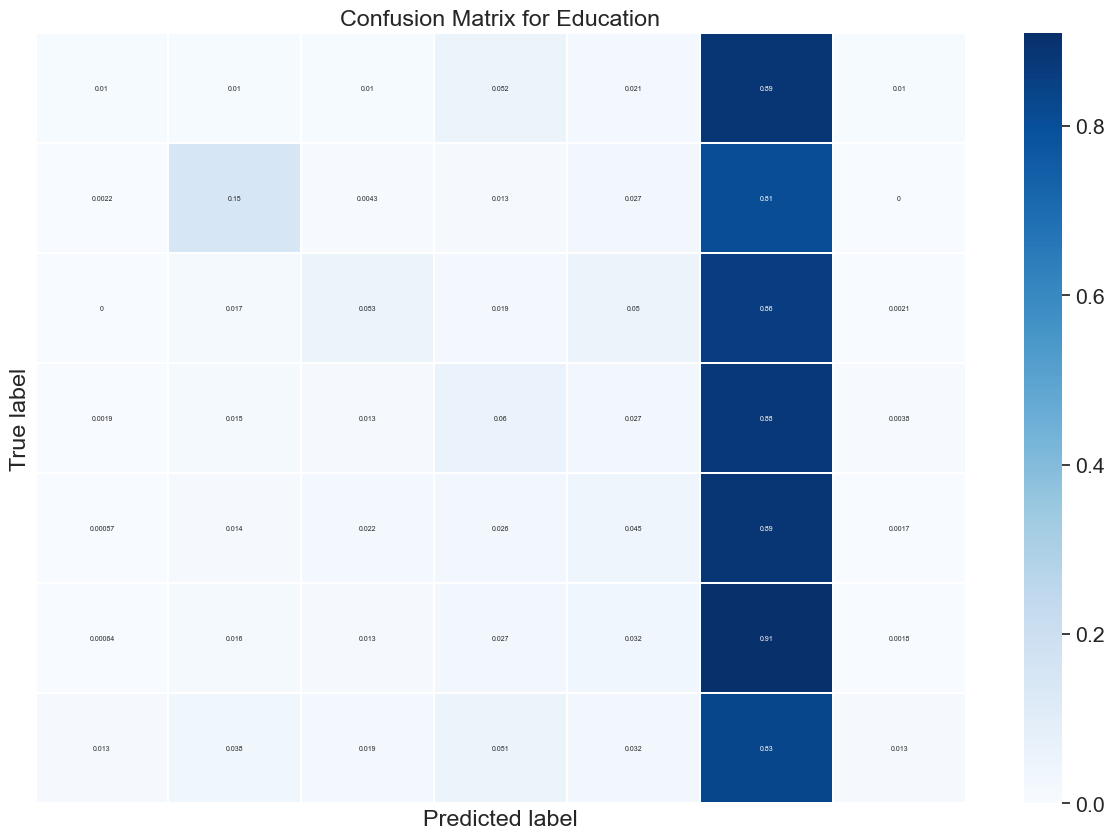

In [338]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, rfc_prediction)

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis] # makes number into %
#matrix = matrix.astype('float')

# Build the plot
plt.figure(figsize = (15, 10))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, 
            annot = True, 
            annot_kws = {'size':5},
            cmap = plt.cm.Blues, 
            linewidths = 0.2)

# Add labels to the plot
# class_names = np.array(okcupid_profiles["income"].unique())
# class_names = [-1, 80000, 20000, 40000, 30000, 50000, 60000, 1000000, 150000, 100000, 500000, 70000, 250000]
class_names = []

tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5

plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks2, class_names, rotation=0)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for Education')
plt.show()

In [ ]:
df['code'] = df['code'].replace(['1.0'],'red')